**Mount the drive for the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Cloning the SAM-2 repository from GitHub and setting up the required dependencies.**

In [ ]:
!git clone https://github.com/facebookresearch/segment-anything-2

Cloning into 'segment-anything-2'...
remote: Enumerating objects: 1070, done.
remote: Total 1070 (delta 0), reused 0 (delta 0), pack-reused 1070 (from 1)
Receiving objects: 100% (1070/1070), 134.70 MiB | 5.35 MiB/s, done.
Resolving deltas: 100% (375/375), done.


In [ ]:
%cd /content/segment-anything-2

/content/segment-anything-2


In [ ]:
!pip install -q -e .

  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 1.2 MB/s eta 0:00:00
  Building editable for SAM-2 (pyproject.toml) ... done


**Let’s download the SAM2 model weights**

In [ ]:

!wget -O sam2_hiera_tiny.pt "https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_tiny.pt"
!wget -O sam2_hiera_small.pt "https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_small.pt"
!wget -O sam2_hiera_base_plus.pt "https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_base_plus.pt"
!wget -O sam2_hiera_large.pt "https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_large.pt"


--2025-02-04 18:42:32--  https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_tiny.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.15, 108.157.254.102, 108.157.254.124, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155906050 (149M) [application/vnd.snesdev-page-table]
Saving to: ‘sam2_hiera_tiny.pt’

sam2_hiera_tiny.pt  100%[===================>] 148.68M   292MB/s    in 0.5s    

2025-02-04 18:42:32 (292 MB/s) - ‘sam2_hiera_tiny.pt’ saved [155906050/155906050]

--2025-02-04 18:42:32--  https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_small.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.15, 108.157.254.102, 108.157.254.124, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 184309650 (176

**Uncompress the dataset**

In [ ]:
!apt-get install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [ ]:
!unrar x /content/drive/MyDrive/KiTS23_dataset/data/Annotations.rar /content/dataset/


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/KiTS23_dataset/data/Annotations.rar

Creating    /content/dataset                                          OK
Creating    /content/dataset/Annotations                              OK
Creating    /content/dataset/Annotations/case_00000                   OK
Extracting  /content/dataset/Annotations/case_00000/00090.png              0%  OK 
Extracting  /content/dataset/Annotations/case_00000/00091.png              0%  OK 
Extracting  /content/dataset/Annotations/case_00000/00092.png              0%  OK 
Extracting  /content/dataset/Annotations/case_00000/00093.png              0%  OK 
Extracting  /content/dataset/Annotations/case_00000/00094.png              0%  OK 
Extracting  /content/dataset/Annotations/case_00000/00095.png              0%  OK 
Extracting  /content/dataset/Annotations/case_00000/00096.png            

In [ ]:
!unrar x /content/drive/MyDrive/KiTS23_dataset/data/JPEGImages.rar /content/dataset/


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/KiTS23_dataset/data/JPEGImages.rar

Creating    /content/dataset/JPEGImages                               OK
Creating    /content/dataset/JPEGImages/case_00000                    OK
Extracting  /content/dataset/JPEGImages/case_00000/00090.jpg               0%  OK 
Extracting  /content/dataset/JPEGImages/case_00000/00091.jpg               0%  OK 
Extracting  /content/dataset/JPEGImages/case_00000/00092.jpg               0%  OK 
Extracting  /content/dataset/JPEGImages/case_00000/00093.jpg               0%  OK 
Extracting  /content/dataset/JPEGImages/case_00000/00094.jpg               0%  OK 
Extracting  /content/dataset/JPEGImages/case_00000/00095.jpg               0%  OK 
Extracting  /content/dataset/JPEGImages/case_00000/00096.jpg               0%  OK 
Extracting  /content/dataset/JPEGImages/case_00000/00097.jp

# **Finetuning SAM2 – Imports and Setup**

In [ ]:
import os
import random
import pandas as pd
import cv2
import torch
import torch.nn.utils
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split

from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor

**Setting the Seed for Reproducibility**

In [ ]:
def set_seeds():
    SEED_VALUE = 42
    random.seed(SEED_VALUE)
    np.random.seed(SEED_VALUE)
    torch.manual_seed(SEED_VALUE)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(SEED_VALUE)
        torch.cuda.manual_seed_all(SEED_VALUE)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = True

set_seeds()

**Data Loading and Splitting**

In [ ]:
import os
from sklearn.model_selection import train_test_split

# Dataset directories
data_dir = "/content/dataset"
images_dir = os.path.join(data_dir, "JPEGImages/case_00002")
masks_dir = os.path.join(data_dir, "Annotations/case_00002")

# List all image and mask files
image_files = sorted([f for f in os.listdir(images_dir) if f.endswith(('.png', '.jpg', '.jpeg'))])
mask_files = sorted([f for f in os.listdir(masks_dir) if f.endswith('.png')])

# Extract base names (without extensions) for matching
image_basenames = {os.path.splitext(f)[0]: f for f in image_files}
mask_basenames = {os.path.splitext(f)[0]: f for f in mask_files}

# Match images with corresponding masks
data = []
for base_name in image_basenames:
    if base_name in mask_basenames:
        data.append({
            "image": os.path.join(images_dir, image_basenames[base_name]),
            "annotation": os.path.join(masks_dir, mask_basenames[base_name])
        })
    else:
        print(f"❌ No matching mask for {image_basenames[base_name]}")

# Check if matching worked
print(f"✅ Total Pairs Found: {len(data)}")

# Split into train and test sets (80% train, 20% test)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Display sample data
print(f"Training Samples: {len(train_data)}")
print(f"Testing Samples: {len(test_data)}")


✅ Total Pairs Found: 162
Training Samples: 129
Testing Samples: 33


In [ ]:
print("Image Files:", image_files)
print("Mask Files:", mask_files)


Image Files: ['00045.jpg', '00046.jpg', '00047.jpg', '00048.jpg', '00049.jpg', '00050.jpg', '00051.jpg', '00052.jpg', '00053.jpg', '00054.jpg', '00055.jpg', '00056.jpg', '00057.jpg', '00058.jpg', '00059.jpg', '00060.jpg', '00061.jpg', '00062.jpg', '00063.jpg', '00064.jpg', '00065.jpg', '00066.jpg', '00067.jpg', '00068.jpg', '00069.jpg', '00070.jpg', '00071.jpg', '00072.jpg', '00073.jpg', '00074.jpg', '00075.jpg', '00076.jpg', '00077.jpg', '00078.jpg', '00079.jpg', '00080.jpg', '00081.jpg', '00082.jpg', '00083.jpg', '00084.jpg', '00085.jpg', '00086.jpg', '00087.jpg', '00088.jpg', '00089.jpg', '00090.jpg', '00091.jpg', '00092.jpg', '00093.jpg', '00094.jpg', '00095.jpg', '00096.jpg', '00097.jpg', '00098.jpg', '00099.jpg', '00100.jpg', '00101.jpg', '00102.jpg', '00103.jpg', '00104.jpg', '00105.jpg', '00106.jpg', '00107.jpg', '00108.jpg', '00109.jpg', '00110.jpg', '00111.jpg', '00112.jpg', '00113.jpg', '00114.jpg', '00115.jpg', '00116.jpg', '00117.jpg', '00118.jpg', '00119.jpg', '00120.jpg'

**Data Preprocessing and Visualization**

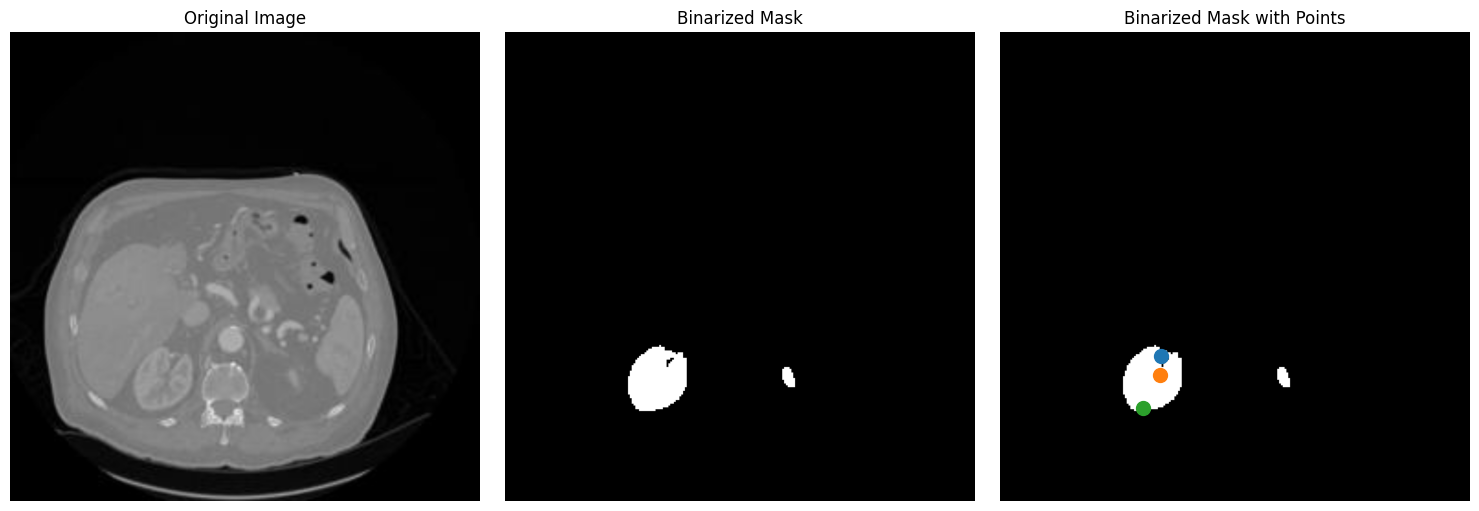

In [ ]:
def read_batch(data, visualize_data=True):
   ent = data[np.random.randint(len(data))]
   Img = cv2.imread(ent["image"])[..., ::-1]
   ann_map = cv2.imread(ent["annotation"], cv2.IMREAD_GRAYSCALE)

   if Img is None or ann_map is None:
       print(f"Error: Could not read image or mask from path {ent['image']} or {ent['annotation']}")
       return None, None, None, 0

   r = np.min([1024 / Img.shape[1], 1024 / Img.shape[0]])
   Img = cv2.resize(Img, (int(Img.shape[1] * r), int(Img.shape[0] * r)))
   ann_map = cv2.resize(ann_map, (int(ann_map.shape[1] * r), int(ann_map.shape[0] * r)),
                        interpolation=cv2.INTER_NEAREST)

   binary_mask = np.zeros_like(ann_map, dtype=np.uint8)
   points = []
   inds = np.unique(ann_map)[1:]
   for ind in inds:
       mask = (ann_map == ind).astype(np.uint8)
       binary_mask = np.maximum(binary_mask, mask)

   eroded_mask = cv2.erode(binary_mask, np.ones((5, 5), np.uint8), iterations=1)
   coords = np.argwhere(eroded_mask > 0)
   if len(coords) > 0:
       for _ in inds:
           yx = np.array(coords[np.random.randint(len(coords))])
           points.append([yx[1], yx[0]])
   points = np.array(points)

   if visualize_data:
       plt.figure(figsize=(15, 5))
       plt.subplot(1, 3, 1)
       plt.title('Original Image')
       plt.imshow(Img)
       plt.axis('off')

       plt.subplot(1, 3, 2)
       plt.title('Binarized Mask')
       plt.imshow(binary_mask, cmap='gray')
       plt.axis('off')

       plt.subplot(1, 3, 3)
       plt.title('Binarized Mask with Points')
       plt.imshow(binary_mask, cmap='gray')
       colors = list(mcolors.TABLEAU_COLORS.values())
       for i, point in enumerate(points):
           plt.scatter(point[0], point[1], c=colors[i % len(colors)], s=100)
       plt.axis('off')

       plt.tight_layout()
       plt.show()

   binary_mask = np.expand_dims(binary_mask, axis=-1)
   binary_mask = binary_mask.transpose((2, 0, 1))
   points = np.expand_dims(points, axis=1)
   return Img, binary_mask, points, len(inds)

Img1, masks1, points1, num_masks = read_batch(train_data, visualize_data=True)


### **Finetuning SAM2 – Building the SAM2 Model**

In [ ]:
sam2_checkpoint = "/content/segment-anything-2/sam2_hiera_tiny.pt"
model_cfg = "sam2_hiera_t.yaml"

sam2_model = build_sam2(model_cfg, sam2_checkpoint, device="cuda")
predictor = SAM2ImagePredictor(sam2_model)

predictor.model.sam_mask_decoder.train(True)
predictor.model.sam_prompt_encoder.train(True)

PromptEncoder(
  (pe_layer): PositionEmbeddingRandom()
  (point_embeddings): ModuleList(
    (0-3): 4 x Embedding(1, 256)
  )
  (not_a_point_embed): Embedding(1, 256)
  (mask_downscaling): Sequential(
    (0): Conv2d(1, 4, kernel_size=(2, 2), stride=(2, 2))
    (1): LayerNorm2d()
    (2): GELU(approximate='none')
    (3): Conv2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
    (4): LayerNorm2d()
    (5): GELU(approximate='none')
    (6): Conv2d(16, 256, kernel_size=(1, 1), stride=(1, 1))
  )
  (no_mask_embed): Embedding(1, 256)
)

### **Training Configuration for Finetuning SAM2**

In [ ]:
scaler = torch.amp.GradScaler()
NO_OF_STEPS = 6000
FINE_TUNED_MODEL_NAME = "fine_tuned_sam2"

optimizer = torch.optim.AdamW(params=predictor.model.parameters(),
                              lr=0.00005,
                              weight_decay=1e-4)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2000, gamma=0.6)
accumulation_steps = 8

### **Finetuning SAM2 – Training and Validation Loops**


**Training Function**

In [ ]:
def train(predictor, train_data, step, mean_iou):
    with torch.amp.autocast(device_type='cuda'):
        image, mask, input_point, num_masks = read_batch(train_data, visualize_data=False)

        # Handle cases where data is invalid and return the current mean_iou
        if image is None or mask is None or num_masks == 0:
            return mean_iou  # Return the current mean_iou if data is invalid

        input_label = np.ones((num_masks, 1))

        if not isinstance(input_point, np.ndarray) or not isinstance(input_label, np.ndarray):
            return mean_iou # Return the current mean_iou if data is invalid

        if input_point.size == 0 or input_label.size == 0:
            return mean_iou # Return the current mean_iou if data is invalid

        # ... (rest of your training logic) ...

        predictor.set_image(image)
        mask_input, unnorm_coords, labels, unnorm_box = predictor._prep_prompts(
            input_point, input_label, box=None, mask_logits=None, normalize_coords=True
        )

        if unnorm_coords is None or labels is None or unnorm_coords.shape[0] == 0 or labels.shape[0] == 0:
            return

        sparse_embeddings, dense_embeddings = predictor.model.sam_prompt_encoder(
            points=(unnorm_coords, labels), boxes=None, masks=None
        )

        batched_mode = unnorm_coords.shape[0] > 1
        high_res_features = [feat_level[-1].unsqueeze(0) for feat_level in predictor._features["high_res_feats"]]

        low_res_masks, prd_scores, _, _ = predictor.model.sam_mask_decoder(
            image_embeddings=predictor._features["image_embed"][-1].unsqueeze(0),
            image_pe=predictor.model.sam_prompt_encoder.get_dense_pe(),
            sparse_prompt_embeddings=sparse_embeddings,
            dense_prompt_embeddings=dense_embeddings,
            multimask_output=True,
            repeat_image=batched_mode,
            high_res_features=high_res_features,
        )

        prd_masks = predictor._transforms.postprocess_masks(low_res_masks, predictor._orig_hw[-1])

        gt_mask = torch.tensor(mask.astype(np.float32)).cuda()
        prd_mask = torch.sigmoid(prd_masks[:, 0])

        seg_loss = (-gt_mask * torch.log(prd_mask + 1e-6) - (1 - gt_mask) * torch.log((1 - prd_mask) + 1e-6)).mean()

        inter = (gt_mask * (prd_mask > 0.5)).sum(1).sum(1)
        iou = inter / (gt_mask.sum(1).sum(1) + (prd_mask > 0.5).sum(1).sum(1) - inter)

        score_loss = torch.abs(prd_scores[:, 0] - iou).mean()
        loss = seg_loss + score_loss * 0.05

        loss = loss / accumulation_steps
        scaler.scale(loss).backward()

        torch.nn.utils.clip_grad_norm_(predictor.model.parameters(), max_norm=1.0)

        if step % accumulation_steps == 0:
            scaler.step(optimizer)
            scaler.update()
            predictor.model.zero_grad()

        scheduler.step()

        mean_iou = mean_iou * 0.99 + 0.01 * np.mean(iou.cpu().detach().numpy())

        if step % 100 == 0:
            current_lr = optimizer.param_groups[0]["lr"]
            print(f"Step {step}: Current LR = {current_lr:.6f}, IoU = {mean_iou:.6f}, Seg Loss = {seg_loss:.6f}")
    return mean_iou

**Validate Function**

In [ ]:
def validate(predictor, test_data, step, mean_iou):
    predictor.model.eval()
    with torch.amp.autocast(device_type='cuda'):
        with torch.no_grad():
            image, mask, input_point, num_masks = read_batch(test_data, visualize_data=False)

            if image is None or mask is None or num_masks == 0:
                return

            input_label = np.ones((num_masks, 1))

            if not isinstance(input_point, np.ndarray) or not isinstance(input_label, np.ndarray):
                return

            if input_point.size == 0 or input_label.size == 0:
                return

            predictor.set_image(image)
            mask_input, unnorm_coords, labels, unnorm_box = predictor._prep_prompts(
                input_point, input_label, box=None, mask_logits=None, normalize_coords=True
            )

            if unnorm_coords is None or labels is None or unnorm_coords.shape[0] == 0 or labels.shape[0] == 0:
                return

            sparse_embeddings, dense_embeddings = predictor.model.sam_prompt_encoder(
                points=(unnorm_coords, labels), boxes=None, masks=None
            )

            batched_mode = unnorm_coords.shape[0] > 1
            high_res_features = [feat_level[-1].unsqueeze(0) for feat_level in predictor._features["high_res_feats"]]
            low_res_masks, prd_scores, _, _ = predictor.model.sam_mask_decoder(
                image_embeddings=predictor._features["image_embed"][-1].unsqueeze(0),
                image_pe=predictor.model.sam_prompt_encoder.get_dense_pe(),
                sparse_prompt_embeddings=sparse_embeddings,
                dense_prompt_embeddings=dense_embeddings,
                multimask_output=True,
                repeat_image=batched_mode,
                high_res_features=high_res_features,
            )

            prd_masks = predictor._transforms.postprocess_masks(low_res_masks, predictor._orig_hw[-1])

            gt_mask = torch.tensor(mask.astype(np.float32)).cuda()
            prd_mask = torch.sigmoid(prd_masks[:, 0])

            seg_loss = (-gt_mask * torch.log(prd_mask + 1e-6)
                        - (1 - gt_mask) * torch.log((1 - prd_mask) + 1e-6)).mean()

            inter = (gt_mask * (prd_mask > 0.5)).sum(1).sum(1)
            iou = inter / (gt_mask.sum(1).sum(1) + (prd_mask > 0.5).sum(1).sum(1) - inter)

            score_loss = torch.abs(prd_scores[:, 0] - iou).mean()
            loss = seg_loss + score_loss * 0.05
            loss = loss / accumulation_steps

            if step % 500 == 0:
                FINE_TUNED_MODEL = FINE_TUNED_MODEL_NAME + "_" + str(step) + ".pt"
                torch.save(predictor.model.state_dict(), FINE_TUNED_MODEL)

            mean_iou = mean_iou * 0.99 + 0.01 * np.mean(iou.cpu().detach().numpy())

            if step % 100 == 0:
                current_lr = optimizer.param_groups[0]["lr"]
                print(f"Step {step}: Current LR = {current_lr:.6f}, Valid_IoU = {mean_iou:.6f}, Valid_Seg Loss = {seg_loss:.6f}")
    return mean_iou

### **Run the Training**

In [ ]:
train_mean_iou = 0
valid_mean_iou = 0

for step in range(1, NO_OF_STEPS + 1):
    train_mean_iou = train(predictor, train_data, step, train_mean_iou)
    valid_mean_iou = validate(predictor, test_data, step, valid_mean_iou)

Step 100: Current LR = 0.000050, IoU = 0.237483, Seg Loss = 0.067021
Step 100: Current LR = 0.000050, Valid_IoU = 0.240899, Valid_Seg Loss = 0.059416
Step 200: Current LR = 0.000050, IoU = 0.399450, Seg Loss = 0.007647
Step 200: Current LR = 0.000050, Valid_IoU = 0.365411, Valid_Seg Loss = 0.054511
Step 300: Current LR = 0.000050, Valid_IoU = 0.532794, Valid_Seg Loss = 0.030264
Step 400: Current LR = 0.000050, IoU = 0.618914, Seg Loss = 0.003426
Step 400: Current LR = 0.000050, Valid_IoU = 0.589118, Valid_Seg Loss = 0.023563
Step 500: Current LR = 0.000050, IoU = 0.660304, Seg Loss = 0.013978
Step 500: Current LR = 0.000050, Valid_IoU = 0.673510, Valid_Seg Loss = 0.018475
Step 600: Current LR = 0.000050, IoU = 0.707948, Seg Loss = 0.005110
Step 600: Current LR = 0.000050, Valid_IoU = 0.730943, Valid_Seg Loss = 0.008069
Step 700: Current LR = 0.000050, IoU = 0.720395, Seg Loss = 0.026569
Step 700: Current LR = 0.000050, Valid_IoU = 0.762574, Valid_Seg Loss = 0.012624
Step 800: Current L

### **Inference on Finetuned SAM2**

In [ ]:

def read_image(image_path, mask_path):  # read and resize image and mask
   img = cv2.imread(image_path)[..., ::-1]  # Convert BGR to RGB
   mask = cv2.imread(mask_path, 0)
   r = np.min([1024 / img.shape[1], 1024 / img.shape[0]])
   img = cv2.resize(img, (int(img.shape[1] * r), int(img.shape[0] * r)))
   mask = cv2.resize(mask, (int(mask.shape[1] * r), int(mask.shape[0] * r)), interpolation=cv2.INTER_NEAREST)
   return img, mask

def get_points(mask, num_points):  # Sample points inside the input mask
   points = []
   coords = np.argwhere(mask > 0)
   for i in range(num_points):
       yx = np.array(coords[np.random.randint(len(coords))])
       points.append([[yx[1], yx[0]]])
   return np.array(points)

{'image': '/content/dataset/JPEGImages/case_00002/00149.jpg', 'annotation': '/content/dataset/Annotations/case_00002/00149.png'}
/content/dataset/Annotations/case_00002/00149.png mask path


<ipython-input-27-b24f06da87c5>:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  predictor.model.load_state_dict(torch.load(FINE_TUNED_MODEL_WEIGHTS))


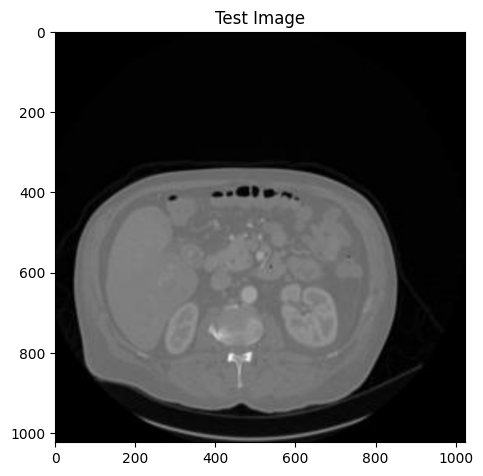

In [ ]:
# Randomly select a test image from the test_data
selected_entry = random.choice(test_data)
print(selected_entry)
image_path = selected_entry['image']
mask_path = selected_entry['annotation']
print(mask_path,'mask path')

# Load the selected image and mask
image, target_mask = read_image(image_path, mask_path)

# Generate random points for the input
num_samples = 30  # Number of points per segment to sample
input_points = get_points(target_mask, num_samples)

# Load the fine-tuned model
FINE_TUNED_MODEL_WEIGHTS = "/content/segment-anything-2/fine_tuned_sam2_6000.pt"
sam2_model = build_sam2(model_cfg, sam2_checkpoint, device="cuda")

# Build net and load weights
predictor = SAM2ImagePredictor(sam2_model)
predictor.model.load_state_dict(torch.load(FINE_TUNED_MODEL_WEIGHTS))



# Perform inference and predict masks
with torch.no_grad():
   predictor.set_image(image)
   masks, scores, logits = predictor.predict(
       point_coords=input_points,
       point_labels=np.ones([input_points.shape[0], 1])
   )

# Process the predicted masks and sort by scores
np_masks = np.array(masks[:, 0])
np_scores = scores[:, 0]
sorted_masks = np_masks[np.argsort(np_scores)][::-1]

# Initialize segmentation map and occupancy mask
seg_map = np.zeros_like(sorted_masks[0], dtype=np.uint8)
occupancy_mask = np.zeros_like(sorted_masks[0], dtype=bool)

# Combine masks to create the final segmentation map
for i in range(sorted_masks.shape[0]):
   mask = sorted_masks[i]
   if (mask * occupancy_mask).sum() / mask.sum() > 0.15:
       continue

   mask_bool = mask.astype(bool)
   mask_bool[occupancy_mask] = False  # Set overlapping areas to False in the mask
   seg_map[mask_bool] = i + 1  # Use boolean mask to index seg_map
   occupancy_mask[mask_bool] = True  # Update occupancy_mask

# Visualization: Show the original image, mask, and final segmentation side by side
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title('Test Image')
plt.imshow(image)

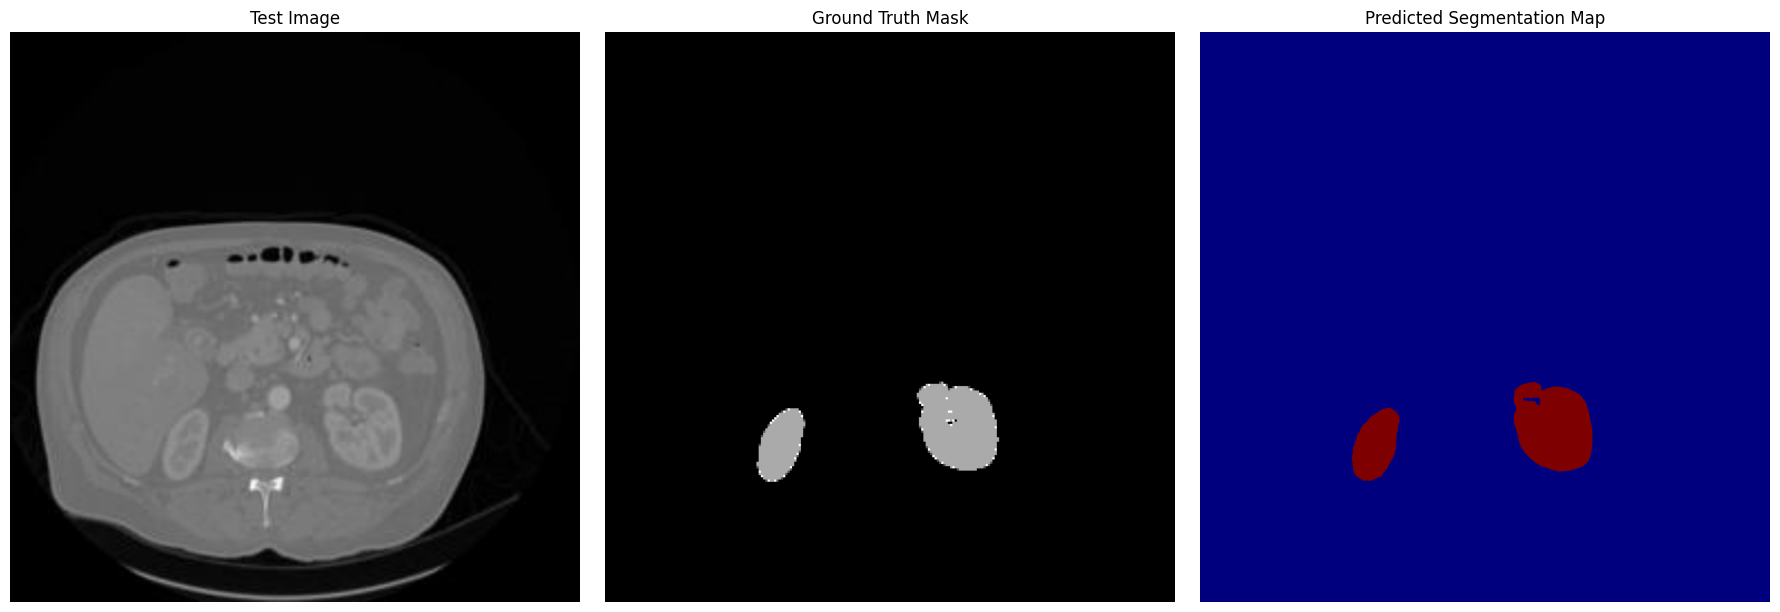

In [ ]:
# Visualization: Show the original image, mask, and final segmentation side by side
plt.figure(figsize=(18, 6))

# Display Test Image
plt.subplot(1, 3, 1)
plt.title('Test Image')
plt.imshow(image)
plt.axis('off')  # Hide axis for cleaner display

# Display Ground Truth Mask
plt.subplot(1, 3, 2)
plt.title('Ground Truth Mask')
plt.imshow(target_mask, cmap='gray')
plt.axis('off')

# Display Predicted Segmentation Map
plt.subplot(1, 3, 3)
plt.title('Predicted Segmentation Map')
plt.imshow(seg_map, cmap='jet')  # Use colormap for segmentation
plt.axis('off')

plt.tight_layout()
plt.show()
